In [178]:
import pandas as pd
import json

In [179]:
with open('/content/intents.json','r') as f:
  intents=json.load(f)

In [180]:
df=pd.DataFrame(['intents'])

In [181]:
df

,0
0,intents


In [182]:
df.isnull().sum()

,0
0,0


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [184]:
pip install nltk


In [185]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

nltk.download('punkt_tab')
import random
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
# stop_words = stopwords.words('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [186]:
def synonym_replacement(tokens, limit):
    augmented_sentences = []
    for i in range(len(tokens)):
        synonyms = []
        for syn in wordnet.synsets(tokens[i]):
            for lemma in syn.lemmas():
                synonyms.append(lemma.name())
        if len(synonyms) > 0:
            num_augmentations = min(limit, len(synonyms))
            sampled_synonyms = random.sample(synonyms, num_augmentations)
            for synonym in sampled_synonyms:
                augmented_tokens = tokens[:i] + [synonym] + tokens[i+1:]
                augmented_sentences.append(' '.join(augmented_tokens))
    return augmented_sentences


In [187]:
# if len(emp_list)>0:
#   num_aug=min(limit,len)



In [190]:
text_data=[]
labels=[]
stopwords= set(nltk.corpus.stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

limit_per_tag=50

for intent in intents['intents']:
    augmented_sentences_per_tag = 0
    for example in intent['patterns']:
        tokens = nltk.word_tokenize(example.lower())
        filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords and token.isalpha()]
        if filtered_tokens:
            text_data.append(' '.join(filtered_tokens))
            labels.append(intent['tag'])

            augmented_sentences = synonym_replacement(filtered_tokens, limit_per_tag - augmented_sentences_per_tag)
            for augmented_sentence in augmented_sentences:
                text_data.append(augmented_sentence)
                labels.append(intent['tag'])
                augmented_sentences_per_tag += 1
                if augmented_sentences_per_tag >= limit_per_tag:
                    break


print(len(text_data))
print(len(labels))


3935
3935


In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(text_data)
y = labels

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
from sklearn.metrics import accuracy_score

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [196]:
import scipy.sparse as sp

In [197]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3)

In [198]:
model=LogisticRegression()

In [199]:
LG=model.fit(x_train,y_train)

In [200]:
LG_pred=model.predict(x_test)

In [201]:
acc=accuracy_score(y_test,LG_pred)

In [202]:
acc

0.9127857747671465

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
model=RandomForestClassifier()

In [205]:
RF=model.fit(x_train,y_train)

In [206]:
RF_pred=model.predict(x_test)


In [207]:
acc=accuracy_score(y_test,RF_pred)

In [208]:
acc

0.9237933954276037

In [209]:
from sklearn.svm import SVC

In [210]:
model=SVC()

In [211]:
SVC_mo=model.fit(x_train,y_train)

In [212]:
SVC_pred=model.predict(x_test)

In [213]:
acc=accuracy_score(y_test,SVC_pred)

In [214]:
acc

0.9085520745131245

In [215]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
model=DecisionTreeClassifier()

In [217]:
DT=model.fit(x_train,y_train)

In [218]:
DT_pred=model.predict(x_test)

In [219]:
acc=accuracy_score(y_test,DT_pred)

In [220]:
acc

0.9170194750211685

In [221]:
import seaborn as sns

In [222]:
import matplotlib.pyplot as plt

In [223]:
# compare=pd.DataFrame({'logistic regression':LG_pred,'Random Forest':RF_pred,'SVC':SVC_pred,'Decision Tree':DT_pred})

In [224]:
# dd=compare[['logistic regression','Random Forest','SVC','Decision Tree']]

In [225]:
accuracies={
     'svm': accuracy_score(y_test, SVC_pred),
    'decision': accuracy_score(y_test, DT_pred),
    'random': accuracy_score(y_test, RF_pred),
    'logistic': accuracy_score(y_test, LG_pred)
}

In [226]:
accc_df=pd.DataFrame(list(accuracies.items()),columns=['model','accuracy'])

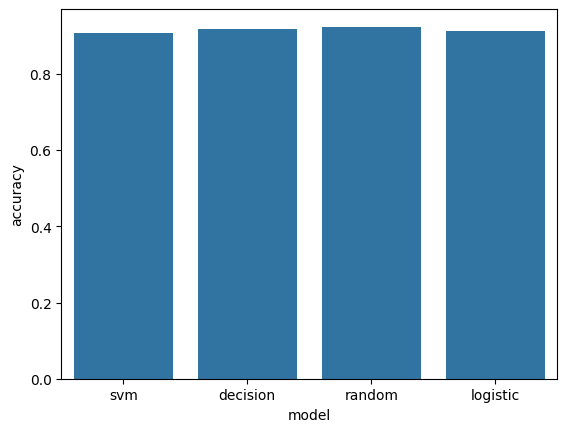

In [227]:
sns.barplot(x='model',y='accuracy',data=accc_df)
plt.show()

In [228]:
import pickle as p

In [229]:
with open("model.pkl","wb") as f:
  p.dump(RF,f)

In [230]:
with open("vectorizer.pkl","wb") as f:
  p.dump(vectorizer,f)